In [1]:
import random
from PIL import Image
import torchvision.transforms as transforms
import cv2
import numpy as np

<class 'PIL.Image.Image'>


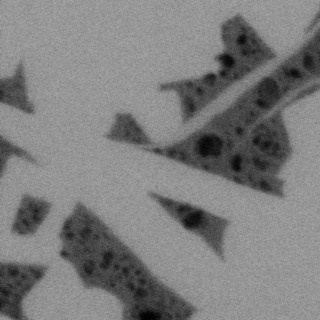

In [11]:
class RandomHorizontalFlip():
    def __init__(self, p: float=0.5):
        self.p = p
    def __call__(self, img):
        if random.random() < self.p:
            img = Image.open(img)
            return img.transpose(Image.FLIP_LEFT_RIGHT)

x = RandomHorizontalFlip()
img = "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/datasets/train/img/Image1-001_0_0_8.jpg"
img = x(img)
print(type(img))
img.show()


<class 'PIL.Image.Image'>


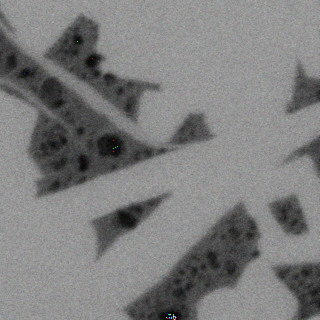

In [3]:
# 增加高斯噪声
class GaussianNoise:
    def __init__(self, mean=0, std_dev=5):
        self.mean = mean
        self.std_dev = std_dev
    def __call__(self, img_path):
        # 读取图像
        try:
            img = Image.open(img_path).convert('RGB')
        except IOError:
            print("图像读取失败，请检查路径和文件是否存在。")
            return None
        # 将图像转换为 NumPy 数组
        img_array = np.array(img)
        # 生成高斯噪声
        gauss_noise = np.random.normal(self.mean, self.std_dev, img_array.shape).astype(np.uint8)
        # 将高斯噪声添加到图像数组中
        noisy_img_array = img_array + gauss_noise
        # 确保结果在 [0, 255] 范围内
        noisy_img_array = np.clip(noisy_img_array, 0, 255)
        # 将数组转换回 PIL.Image 对象
        noisy_img = Image.fromarray(noisy_img_array.astype('uint8'))
        return noisy_img
    
x = GaussianNoise()
img = "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/datasets/train/img/Image1-001_0_0_8.jpg"
img = x(img)
print(type(img))
img.show()

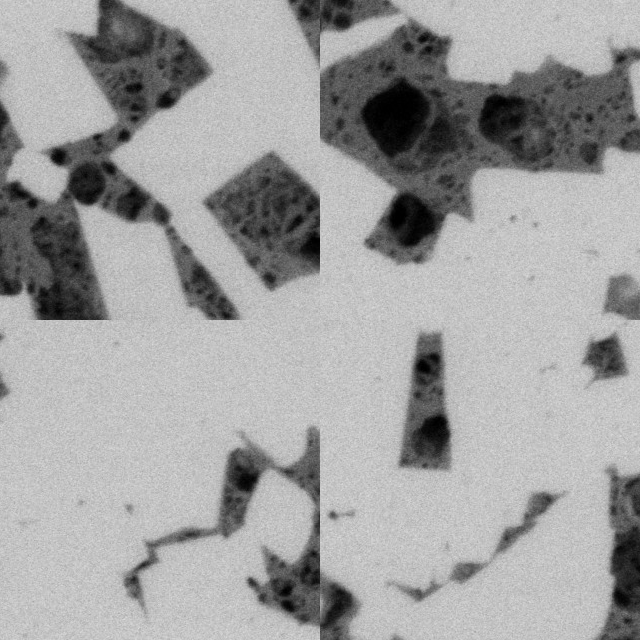

In [4]:
from PIL import Image
import random

class RandomCrop():
    def __init__(self, size=(320, 320)):  # 确保size是一个元组
        self.size = size
    
    def __call__(self, img_path, num_crops=9):  # 添加num_crops参数来控制裁剪次数
        img = Image.open(img_path)
        w, h = img.size
        th, tw = self.size

        # 存储裁剪后的图像
        crops = []
        for _ in range(num_crops):
            if w == tw and h == th:
                # 如果图片尺寸已经符合要求，则直接添加原图
                crops.append(img)
            else:
                x1 = random.randint(0, w - tw + 1)
                y1 = random.randint(0, h - th + 1)
                img_cropped = img.crop((x1, y1, x1 + tw, y1 + th))
                crops.append(img_cropped)
        
        return crops

# 使用示例
x = RandomCrop(size=(320, 320))  # 指定裁剪尺寸
img_path = "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/Image1-001.jpg"
crops = x(img_path, num_crops=10)  # 指定要裁剪的次数

if len(crops) >= 4:
    # 创建一个新的图像来作为矩阵
    new_width = crops[0].width * 2
    new_height = crops[0].height * 2
    result_img = Image.new('RGB', (new_width, new_height))

    # 将裁剪后的图像粘贴到新图像上，形成矩阵
    result_img.paste(crops[0], (0, 0))  # 左上角
    result_img.paste(crops[1], (crops[0].width, 0))  # 右上角
    result_img.paste(crops[2], (0, crops[0].height))  # 左下角
    result_img.paste(crops[3], (crops[0].width, crops[0].height))  # 右下角

    # 显示结果图像
    result_img.show()